In [1]:
from skimage import filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

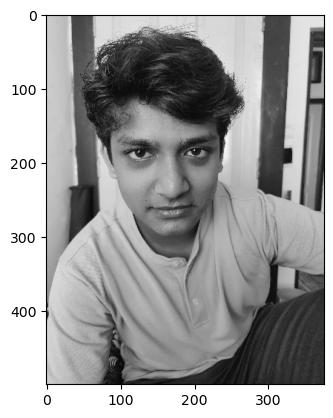

In [3]:
img_p = cv2.imread('./image/pranav.jpeg',0)
small_to_large_image_size_ratio = 0.125
img_p = cv2.resize(img_p, # original image
                       (0,0), # set fx and fy, not the final size
                       fx=small_to_large_image_size_ratio, 
                       fy=small_to_large_image_size_ratio, 
                       interpolation=cv2.INTER_NEAREST)
plt.imshow(img_p,cmap='grey')
plt.show()

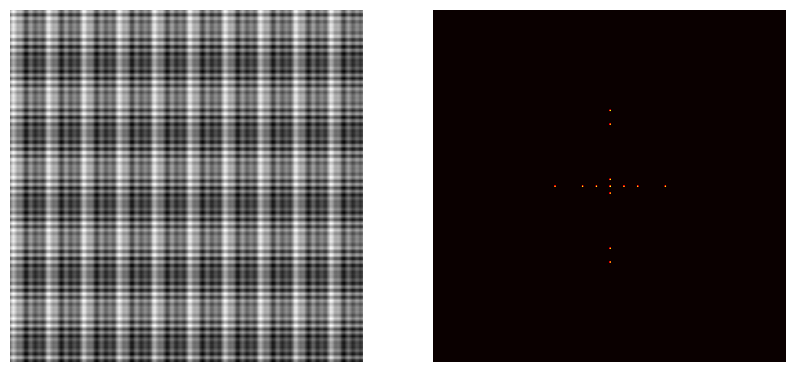

In [23]:
N = 2**8
x, y = np.meshgrid(np.arange(N), np.arange(N))

k = 10
m = np.cos(2*np.pi/N*k*x) + np.sin(2*np.pi/N*k*x) + np.sin(4*np.pi/N*k*x) + np.sin(8 *
                                                                                   np.pi/N*k*x) + np.sin(11*np.pi/N*k*y) + np.sin(np.pi/N*k*y) + np.sin(9*np.pi/N*k*y)
m = (m-m.min())/(m.max()-m.min())*255
M = np.fft.fft2(m)
Ms = np.fft.fftshift(M)

plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
plt.imshow(m, cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.log(1+np.absolute(Ms)), cmap = 'hot')
plt.axis('off')

plt.show()

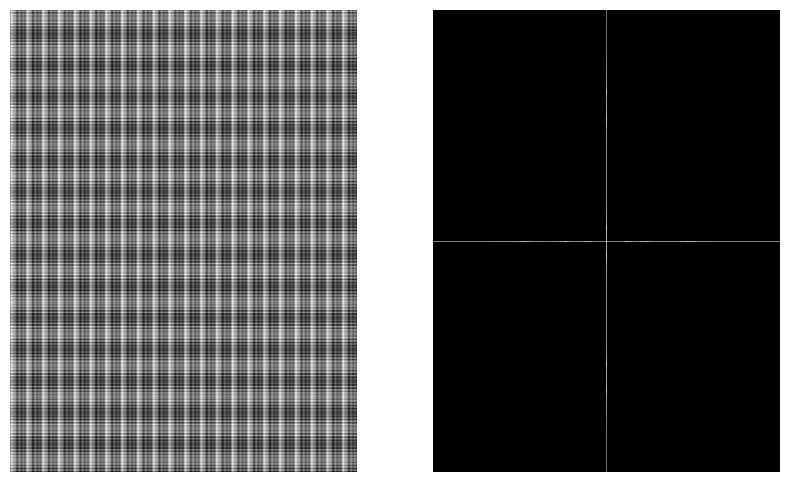

In [13]:
x, y = np.meshgrid(np.arange(img_p.shape[1]), np.arange(img_p.shape[0]))

k = 15
m = np.cos(2*np.pi/N*k*x) + np.sin(2*np.pi/N*k*x) + np.sin(4*np.pi/N*k*x) + np.sin(8 *
                                                                                   np.pi/N*k*x) + np.sin(11*np.pi/N*k*y) + np.sin(np.pi/N*k*y) + np.sin(9*np.pi/N*k*y)
m = (m-m.min())/(m.max()-m.min())*255

M = np.fft.fft2(m)
Ms = np.fft.fftshift(M)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(m, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(1+np.absolute(Ms)), cmap='gray')
plt.axis('off')

plt.show()

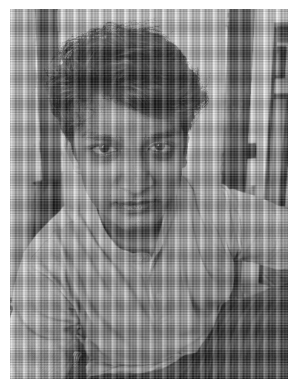

In [15]:
img = np.zeros(img_p.shape)
cv2.accumulate(m,img)
cv2.accumulate(img_p,img)
img = img/2
plt.imshow(img,cmap='grey')
plt.axis(False)
plt.show()

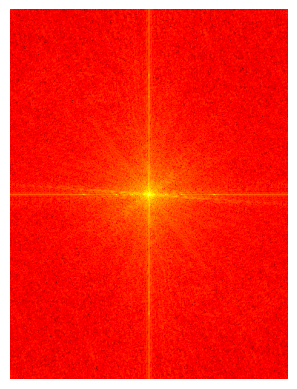

In [16]:
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='hot')
plt.axis('off')
plt.show()

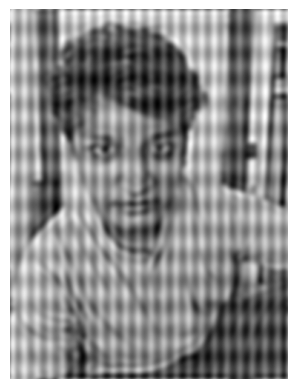

In [20]:
plt.imshow(filters.butterworth(img,cutoff_frequency_ratio=.09, order=5, high_pass=False),cmap='grey')
plt.axis(False)
plt.show()